**Data exploration**<br>
**Pandas and Visualization**<br>

In [6]:
%matplotlib inline
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import os
import warnings

In [7]:
df=pd.read_csv("airline-safety.csv")

In [8]:
df.head()

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,Aer Lingus,320906734,2,0,0,0,0,0
1,Aeroflot*,1197672318,76,14,128,6,1,88
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0
3,Aeromexico*,596871813,3,1,64,5,0,0
4,Air Canada,1865253802,2,0,0,2,0,0


In [9]:
df.dtypes

airline                   object
avail_seat_km_per_week     int64
incidents_85_99            int64
fatal_accidents_85_99      int64
fatalities_85_99           int64
incidents_00_14            int64
fatal_accidents_00_14      int64
fatalities_00_14           int64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   airline                 56 non-null     object
 1   avail_seat_km_per_week  56 non-null     int64 
 2   incidents_85_99         56 non-null     int64 
 3   fatal_accidents_85_99   56 non-null     int64 
 4   fatalities_85_99        56 non-null     int64 
 5   incidents_00_14         56 non-null     int64 
 6   fatal_accidents_00_14   56 non-null     int64 
 7   fatalities_00_14        56 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 3.6+ KB


In [13]:
df.memory_usage() # in bytes

Index                     128
airline                   448
avail_seat_km_per_week    448
incidents_85_99           448
fatal_accidents_85_99     448
fatalities_85_99          448
incidents_00_14           448
fatal_accidents_00_14     448
fatalities_00_14          448
dtype: int64

In [14]:
df.memory_usage().sum()

3712

In [15]:
df.describe()

,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
count,5.600000e+01,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,1.384621e+09,7.178571,2.178571,112.410714,4.125000,0.660714,55.517857
std,1.465317e+09,11.035656,2.861069,146.691114,4.544977,0.858684,111.332751
min,2.593733e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.740362e+08,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,8.029089e+08,4.000000,1.000000,48.500000,3.000000,0.000000,0.000000
75%,1.847239e+09,8.000000,3.000000,184.250000,5.250000,1.000000,83.250000
max,7.139291e+09,76.000000,14.000000,535.000000,24.000000,3.000000,537.000000


**Statistical moments**<br>
Mean (1st moment)<br>
Variance (2nd moment)<br>
Skewness (3rd moment)<br>
Kurtosis (4th moment)<br>

In [16]:
df.mean()

avail_seat_km_per_week    1.384621e+09
incidents_85_99           7.178571e+00
fatal_accidents_85_99     2.178571e+00
fatalities_85_99          1.124107e+02
incidents_00_14           4.125000e+00
fatal_accidents_00_14     6.607143e-01
fatalities_00_14          5.551786e+01
dtype: float64

In [17]:
df['incidents_00_14'].mean()

4.125

In [18]:
df.var()

avail_seat_km_per_week    2.147154e+18
incidents_85_99           1.217857e+02
fatal_accidents_85_99     8.185714e+00
fatalities_85_99          2.151828e+04
incidents_00_14           2.065682e+01
fatal_accidents_00_14     7.373377e-01
fatalities_00_14          1.239498e+04
dtype: float64


**Skewness**<br>
Skewness is the measure of the symmetry of a distribution compared to standard normal distribution<br>

+ive - right skewed (mean is to the right of mode/median). Long tail in the +ive direction.<br>
0 - symmetric<br>
-ive - left skewed (mean is to the left of mode/median). Long tail in the -ive direction.<br>

In [20]:
df.skew()

avail_seat_km_per_week    2.337911
incidents_85_99           4.731159
fatal_accidents_85_99     2.296527
fatalities_85_99          1.316283
incidents_00_14           2.210143
fatal_accidents_00_14     0.907261
fatalities_00_14          2.674622
dtype: float64

**Kurtosis**<br>
Kurtosis is a measure of the flatness or peakedness of a distribution compared to the normal distribution.<br>
+ive - Leptokurtosis (sharper/spikier peak compared to the normal dist.)<br>
0 - Mesokurtic (normal dist.)<br>
-ive - Platykurtic (flatter peak compared to the normal dist.) eg. Uniform distribution<br>

In [21]:
df.kurtosis()

avail_seat_km_per_week     6.012276
incidents_85_99           27.874700
fatal_accidents_85_99      6.324671
fatalities_85_99           0.834040
incidents_00_14            6.474408
fatal_accidents_00_14     -0.500499
fatalities_00_14           7.553167
dtype: float64

**min / max / median**

In [22]:
# min of each column
df.min()

airline                   Aer Lingus
avail_seat_km_per_week     259373346
incidents_85_99                    0
fatal_accidents_85_99              0
fatalities_85_99                   0
incidents_00_14                    0
fatal_accidents_00_14              0
fatalities_00_14                   0
dtype: object

In [23]:
# max of each column
df.max()

airline                   Xiamen Airlines
avail_seat_km_per_week         7139291291
incidents_85_99                        76
fatal_accidents_85_99                  14
fatalities_85_99                      535
incidents_00_14                        24
fatal_accidents_00_14                   3
fatalities_00_14                      537
dtype: object

In [24]:
# median of each column
df.median()

avail_seat_km_per_week    802908893.0
incidents_85_99                   4.0
fatal_accidents_85_99             1.0
fatalities_85_99                 48.5
incidents_00_14                   3.0
fatal_accidents_00_14             0.0
fatalities_00_14                  0.0
dtype: float64

**Correlation**

In [25]:
df.corr()

,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
avail_seat_km_per_week,1.000000,0.279538,0.468300,0.209835,0.725917,0.375673,0.228484
incidents_85_99,0.279538,1.000000,0.856991,0.274394,0.403009,0.390249,0.195337
fatal_accidents_85_99,0.468300,0.856991,1.000000,0.540866,0.572923,0.498758,0.186985
fatalities_85_99,0.209835,0.274394,0.540866,1.000000,0.273696,0.228180,0.046979
incidents_00_14,0.725917,0.403009,0.572923,0.273696,1.000000,0.598071,0.282009
fatal_accidents_00_14,0.375673,0.390249,0.498758,0.228180,0.598071,1.000000,0.695864
fatalities_00_14,0.228484,0.195337,0.186985,0.046979,0.282009,0.695864,1.000000


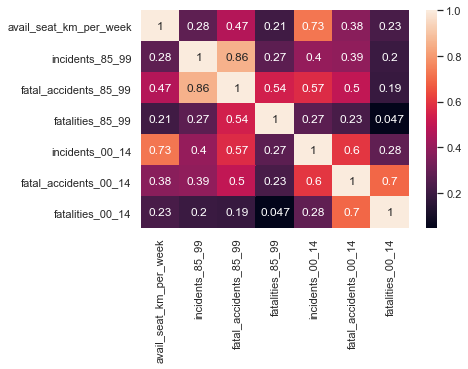

In [27]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)

**Lineplot**

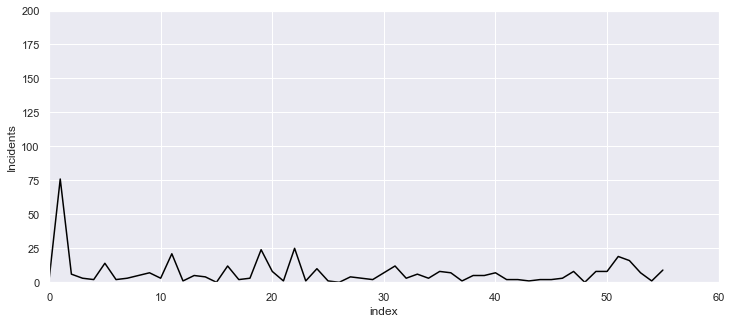

In [31]:
# Plotting with index along the x-axis
df['incidents_85_99'].plot(figsize=(12, 5), color='black') # color and figsize changed

plt.xlim(0, 60) # range for x-axis
plt.ylim(0, 200) # range for x-axis
plt.xlabel('index')
plt.ylabel('Incidents'); # ";" prevents object info from displaying

**Scatter Plot**

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


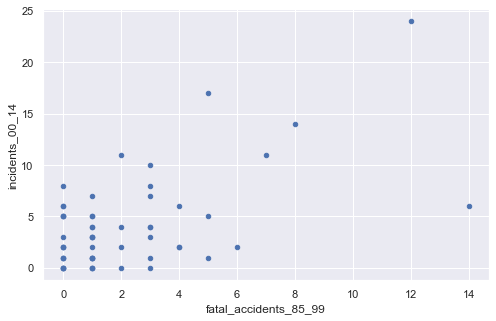

In [36]:
# plotting one variable against the other
df.plot.scatter('fatal_accidents_85_99', 'incidents_00_14', figsize=(8, 5))

**Boxplot**

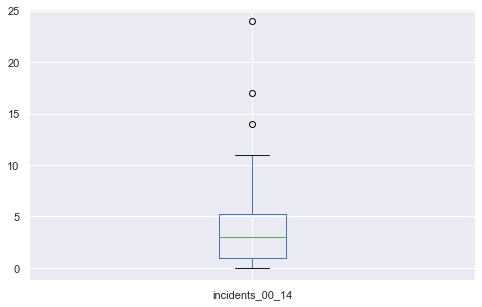

In [39]:
df['incidents_00_14'].plot.box(figsize=(8, 5))

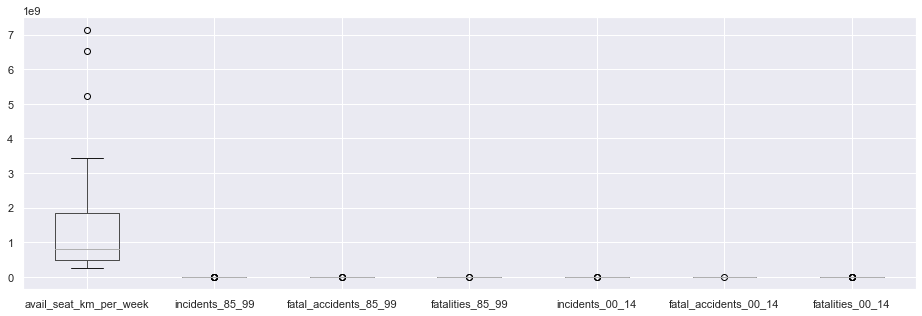

In [41]:
df.boxplot(figsize=(16, 5))

**Histogram**

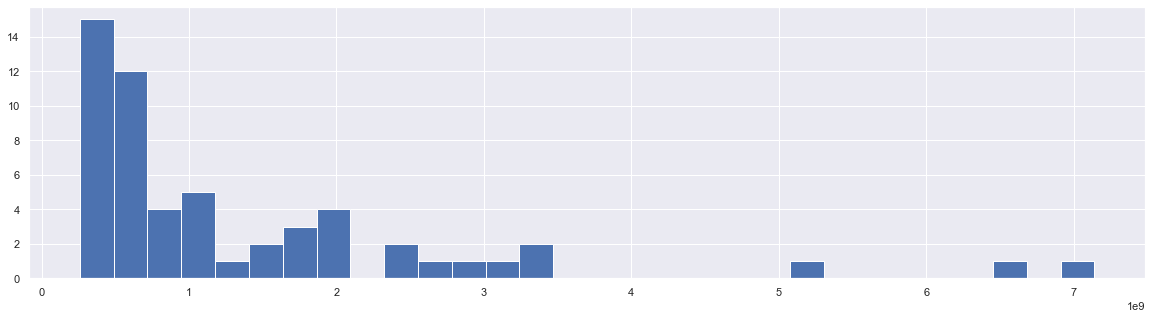

In [43]:
df['avail_seat_km_per_week'].hist(bins=30, figsize=(20, 5));

**Barplot**

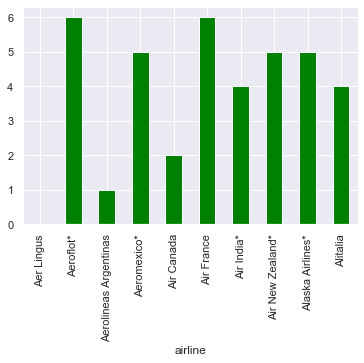

In [49]:
df_avg_BP = df.groupby('airline')['incidents_00_14'].mean()
df_avg_BP[:10].plot.bar(color='green');